<h3 align='center'> <b> ĐỒ ÁN 1: DỰ ĐOÁN RỦI RO RỜI BỎ DỊCH VỤ CỦA KHÁCH HÀNG </b> </h3>

<h3 align='center'> <b> (CHURN RISK PREDICTION) </b> </32>

### **Thành viên nhóm:**

- ####  20280094 - Lê Hoài Thuơng
- ####  20280095 - Nguyễn Ngọc Anh Thy

# **I - Mô tả dữ liệu:**

- **customer_id**: Mã định danh duy nhất của khách hàng.


- **Name**: Đại diện cho tên của một khách hàng.

- **Age**: Tuổi của khách hàng.

- **security_no**: số bảo mật duy nhất được sử dụng để xác định khách hàng.

- **region_category**: khu vực mà khách hàng cư trú (*Village, City, Town,..*).

- **membership_category**: hạng mục thành viên của khách hàng đang sử dụng (*Platinum Membership, Premium Membership, No Membership,...*).

- **joining_date**: ngày khách hàng trở thành thành viên.

- **joined_through_referral**: cho biết khách hàng có tham gia bằng bất kỳ mã hoặc ID giới thiệu nào hay không (*Yes/No/?*).

- **referral_id**: ID của khách hàng đã giới thiệu khách hàng này.

- **preferred_offer_types**: loại ưu đãi mà khách hàng ưa thích (*Gift Vouchers/Coupons, Credit/Debit Card Offers*).

- **medium_of_operation**: phương tiện hoạt động mà khách hàng sử dụng cho các giao dịch (*Desktop, Smartphone, Both*).

- **internet_option**: loại dịch vụ internet mà khách hàng sử dụng (*Wi-Fi, Mobile_Data, Fiber_Optic,..*).

- **last_visit_time**: lần cuối khách hàng truy cập trang web.

- **days_since_last_login**: số ngày kể từ lần cuối khách hàng đăng nhập vào trang web.

- **avg_time_spent**: thời gian trung bình mà khách hàng dành cho trang web.

- **avg_transaction_value**: giá trị giao dịch trung bình của một khách hàng.

- **avg_frequency_login_days**: số lần khách hàng đã đăng nhập vào trang web.

- **point_in_wallet**: số điểm được trao cho khách hàng trên mỗi giao dịch.

- **used_special_discount**: cho biết khách hàng có sử dụng chiết khấu đặc biệt được cung cấp hay không (*Yes/No*).

- **offer_application_preference**: cho biết khách hàng có thích các ưu đãi hay không (*Yes/No*).

- **past_complaint**: cho biết khách hàng có đưa ra bất kỳ khiếu nại nào không (*Yes/No*).

- **complaint_status**: cho biết các khiếu nại của khách hàng đã được giải quyết hay chưa (*Solved, Unsolved, Solved in Follow-up*).

- **feedback**: phản hồi do khách hàng cung cấp.

- **churn_risk_score**: điểm số rủi ro rời bỏ dịch vụ của khách hàng nằm trong khoảng từ 1 đến 5.

# **II - Load dataset:**

In [ ]:
# !pip install -U pandas_profiling
# !pip install -U pandas
# !pip install -U xlrd
# !pip install -U catboost

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
path = "D:/OneDrive - VNU-HCMUS/Document/NĂM 3/ML/TH/Final/Banking.csv" # Path to your file

df = pd.read_csv(path)
df.head()


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [43]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [44]:
df.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


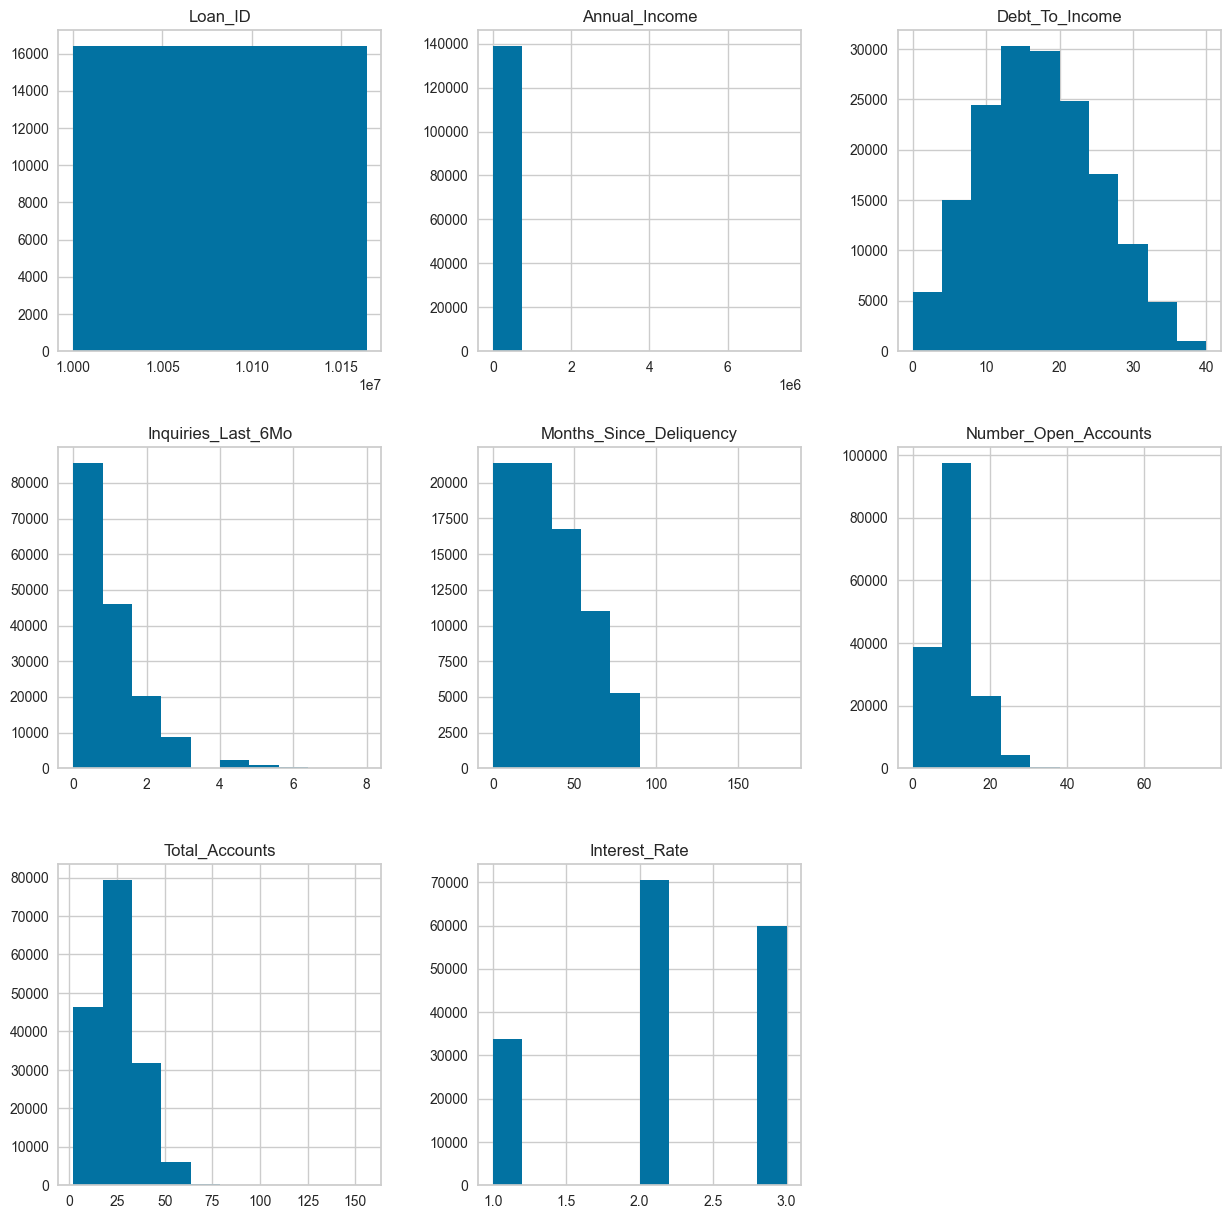

In [45]:
df.hist(figsize=(15, 15))
plt.show()

# **III - Exploratory Data Analysis:**

In [46]:
#Data Analysis
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

print(numerical_cols)

['Loan_ID', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']


<AxesSubplot: xlabel='count', ylabel='Interest_Rate'>

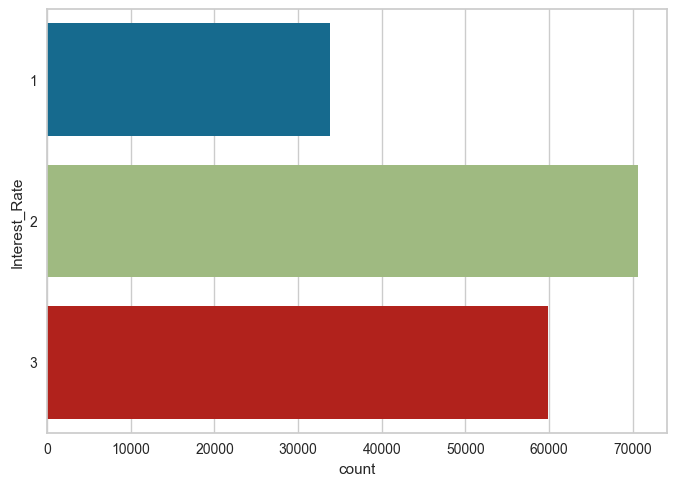

In [47]:
sns.countplot(y="Interest_Rate", data=df)

C:\Users\Thyaa\AppData\Local\Temp\ipykernel_31124\3943477899.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


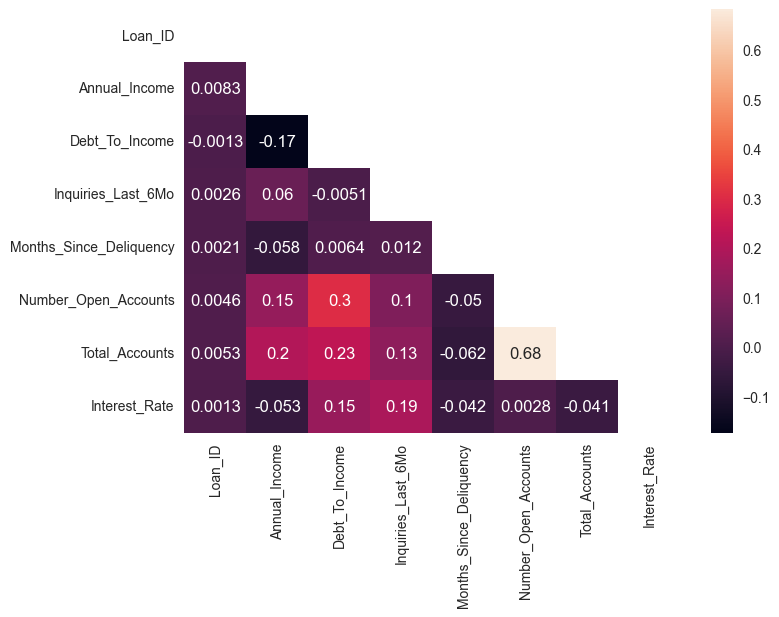

In [48]:
corr = df[numerical_cols].corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

# **IV - Preprocessing:**

In [49]:
def preprocessing_data(df):
    df.fillna('NaN', inplace=True)
    return df

data = preprocessing_data(df.copy())

In [50]:
#data = df.copy()

In [51]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(data):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    encoder = LabelEncoder()
    for col in categorical_cols:
      data.loc[:, col] = encoder.fit_transform(data[col])

    return data

data = apply_feature_engineering(data)
data

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,1165,10,4,68000.0,2,0,18.37,0,NaN,9,14,0,1
1,10000002,904,4,0,NaN,0,2,14.93,0,17.0,12,24,0,3
2,10000003,667,7,0,75566.4,1,2,15.88,0,NaN,12,16,1,3
3,10000004,279,10,1,56160.0,1,2,14.34,3,NaN,16,22,1,3
4,10000005,319,8,3,96000.0,1,2,22.17,1,NaN,19,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,508,1,4,NaN,1,1,13.56,0,NaN,13,16,1,2
164305,10164306,1125,8,3,NaN,1,11,9.12,0,36.0,13,30,1,2
164306,10164307,489,1,0,NaN,0,1,18.17,1,NaN,17,30,1,1
164307,10164308,39,4,4,NaN,2,6,18.75,1,48.0,16,62,0,3


In [52]:
processed_df = apply_feature_engineering(data.copy())
processed_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,1165,10,4,68000.0,2,0,18.37,0,NaN,9,14,0,1
1,10000002,904,4,0,NaN,0,2,14.93,0,17.0,12,24,0,3
2,10000003,667,7,0,75566.4,1,2,15.88,0,NaN,12,16,1,3
3,10000004,279,10,1,56160.0,1,2,14.34,3,NaN,16,22,1,3
4,10000005,319,8,3,96000.0,1,2,22.17,1,NaN,19,30,0,1


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

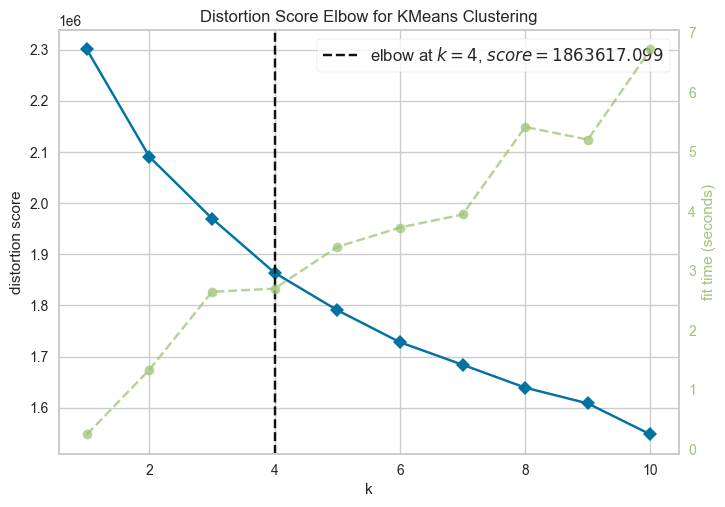

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Load your data into a DataFrame (assuming 'df' is your DataFrame)
# Replace NaN values with a placeholder or appropriate imputation strategy
imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Apply the KElbowVisualizer
elbow_method = KElbowVisualizer(KMeans(), k=(1, 11))
elbow_method.fit(scaled_data)
elbow_method.show()


In [55]:
kmeans_model = KMeans(n_clusters= 4)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=4)

In [56]:
labels = kmeans_model.labels_
labels

array([2, 0, 0, ..., 1, 1, 2])

In [57]:
#Để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([2, 0, 0, ..., 1, 1, 2])

In [58]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_.shape

(4, 14)

In [59]:
labels.max()

3

In [60]:
df_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,cluster
0,10000001,1165,10,4,68000.0,2,0,18.37,0,NaN,9,14,0,1,2
1,10000002,904,4,0,NaN,0,2,14.93,0,17.0,12,24,0,3,0
2,10000003,667,7,0,75566.4,1,2,15.88,0,NaN,12,16,1,3,0
3,10000004,279,10,1,56160.0,1,2,14.34,3,NaN,16,22,1,3,1
4,10000005,319,8,3,96000.0,1,2,22.17,1,NaN,19,30,0,1,1


# **V - Feature Engineering:**

##PCA

In [61]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=len(data.columns)) #khai báo
pca.fit(scaled_data)

PCA(n_components=14)

In [62]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([14.54671537,  9.80448895,  9.06686512,  7.32255163,  7.28173242,
        7.16923326,  7.1188252 ,  7.07712213,  6.77642211,  6.37707845,
        6.15491598,  4.84850799,  4.27060251,  2.18493889])

## 3 dimension PCA

In [63]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

In [64]:
pca_df

,pca_1,pca_2,pca_3
0,-1.680969,0.997341,-1.653795
1,0.380716,-0.573114,0.670541
2,-0.306887,-0.421300,0.096553
3,0.684601,-1.431249,0.598589
4,1.175860,0.701933,-1.089967
...,...,...,...
164304,-0.680412,0.476266,-0.672116
164305,-0.777723,-0.296324,1.361160
164306,1.563850,1.117682,-0.137085
164307,1.960012,-0.448139,-0.385310


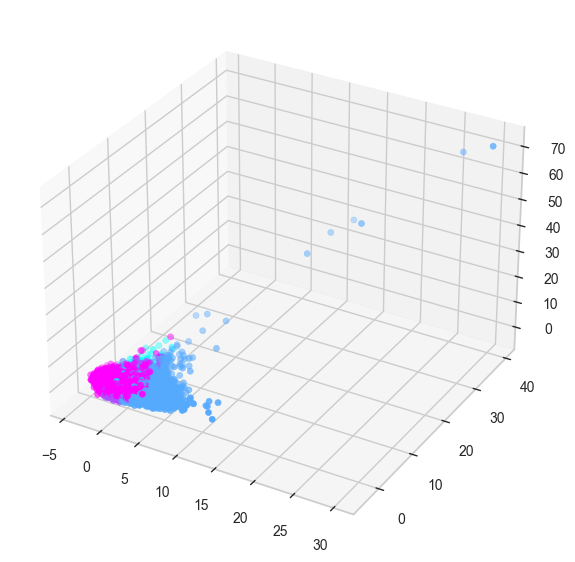

In [65]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [66]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

In [67]:
pca_df.head()

,pca1,pca2
0,-1.680777,0.993321
1,0.380975,-0.572075
2,-0.306238,-0.424960
3,0.685498,-1.432424
4,1.176707,0.695960


In [68]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.680777,0.993321,2
1,0.380975,-0.572075,0
2,-0.306238,-0.424960,0
3,0.685498,-1.432424,1
4,1.176707,0.695960,1


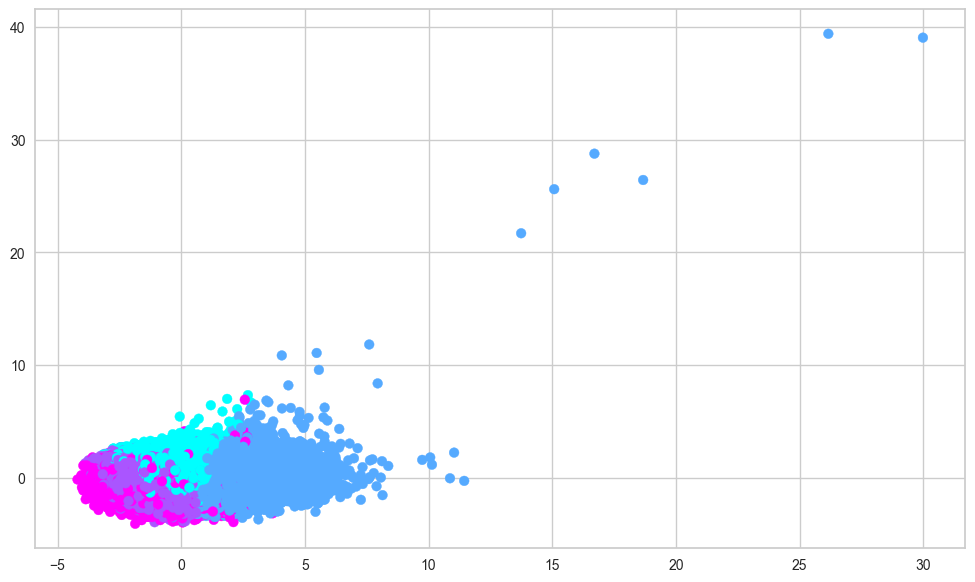

In [69]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show()

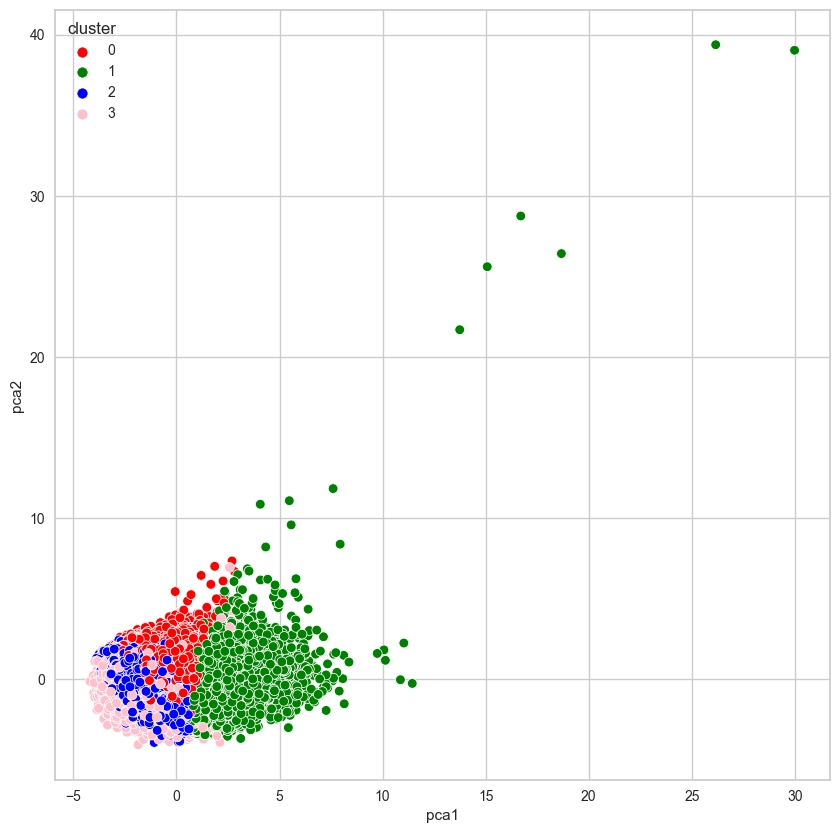

In [70]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ['red', 'green', 'blue', 'pink'])
plt.show()

In [71]:
def prepare_X_y(data):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # feature_names = df.columns.tolist()
    # feature_names.remove("Interest_Rate")
    # # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    # X = df[feature_names].values
    # y = df.Interest_Rate.values
    X = data.drop(['Interest_Rate'],axis=1).values
    y = data['Interest_Rate'].values # Todo: Select label
    return X, y

X, y = prepare_X_y(processed_df)

# **VI - Apply machine learning model:**

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_performance(y_true, y_pred):

    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='weighted'))
    print("Recall: ", recall_score(y_true , y_pred, average='weighted'))
    print("F1: ", f1_score(y_true , y_pred, average='weighted'))

    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))

# pred = naive_model.predict(testX)
# score = calculate_performance(testY, pred)
# print("Performance score:", score)

## Train-test split:

In [73]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Create the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define the pipeline with imputation and the classifier
dt_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer()),  # Handle missing values
    ("tree", clf)  # DecisionTreeClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
}

# Perform grid search with cross-validation
dt_model = GridSearchCV(dt_pipe, param_grid, scoring="recall", n_jobs=2)
dt_model.fit(X_train, y_train)

# Print the best parameter and score
pred = dt_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % dt_model.best_score_)
print(dt_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
              precision    recall  f1-score   support

           1       0.31      0.32      0.31     23540
           2       0.45      0.45      0.45     49414
           3       0.47      0.46      0.47     42063

    accuracy                           0.43    115017
   macro avg       0.41      0.41      0.41    115017
weighted avg       0.43      0.43      0.43    115017



In [75]:
calculate_performance(y_test, pred)

Accuracy:  0.42758896510950556
Precision:  0.42872048990440037
Recall:  0.42758896510950556
F1:  0.42812676052505844
Confusion matrix: 
 [[ 7439 10297  5804]
 [10763 22213 16438]
 [ 6183 16352 19528]]


## Logistic Regression


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Create the LogisticRegression classifier
clf = LogisticRegression()

# Define the pipeline with imputation, scaling, and the classifier
log_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
    ("scaler", StandardScaler()),  # Scale the features
    ("logreg", clf)  # LogisticRegression
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],
    'logreg__solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# Perform grid search with cross-validation
log_model = GridSearchCV(log_pipe, param_grid, scoring="f1_macro", cv=5)
log_model.fit(X_train, y_train)

# Print the best parameter and score
pred = log_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % log_model.best_score_)
print(log_model.best_params_)
print(classification_report(y_test, pred))


Best parameter (CV score=0.409):
{'logreg__C': 10.0, 'logreg__solver': 'sag'}
              precision    recall  f1-score   support

           1       0.51      0.09      0.16     23540
           2       0.47      0.70      0.56     49414
           3       0.54      0.48      0.51     42063

    accuracy                           0.49    115017
   macro avg       0.51      0.42      0.41    115017
weighted avg       0.50      0.49      0.46    115017



In [77]:
calculate_performance(y_test, pred)

Accuracy:  0.4949963918377283
Precision:  0.504495560350084
Recall:  0.4949963918377283
F1:  0.4601834589925734
Confusion matrix: 
 [[ 2176 17682  3682]
 [ 1660 34412 13342]
 [  452 21266 20345]]


## Naive Bayes Classification

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Khởi tạo pipeline
nb_pipe = Pipeline([
    ('scaler', StandardScaler()), # Tiêu chuẩn hóa dữ liệu
    ("imputer", SimpleImputer(strategy='mean')),
    ('naive_bayes', BernoulliNB()),  # Mô hình Naive Bayes
])

# Đào tạo pipeline trên tập huấn luyện
nb_pipe.fit(X_train, y_train)

pred = nb_pipe.predict(X_test)

# Đánh giá độ chính xác của mô hình
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           1       0.44      0.07      0.12     23540
           2       0.46      0.70      0.56     49414
           3       0.51      0.44      0.47     42063

    accuracy                           0.48    115017
   macro avg       0.47      0.40      0.38    115017
weighted avg       0.48      0.48      0.44    115017



In [79]:
calculate_performance(y_test, pred)

Accuracy:  0.47578184094525156
Precision:  0.47549071352740785


Recall:  0.47578184094525156
F1:  0.4363633900167774
Confusion matrix: 
 [[ 1687 17522  4331]
 [ 1514 34687 13213]
 [  607 23107 18349]]


## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Create the RandomForestClassifier
clf = RandomForestClassifier()

# Define the pipeline with imputation, scaling, and the classifier
pipe_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
    ("scaler", StandardScaler()),  # Standardize features
    ("rf", clf)  # RandomForestClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
}

rf_model = GridSearchCV(pipe_rf, param_grid, scoring="recall", n_jobs=2)
rf_model.fit(X_train, y_train)

# Print the best parameter and score
pred = rf_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % rf_model.best_score_)
print(rf_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
              precision    recall  f1-score   support

           1       0.49      0.22      0.30     23540
           2       0.49      0.62      0.55     49414
           3       0.56      0.55      0.55     42063

    accuracy                           0.51    115017
   macro avg       0.51      0.47      0.47    115017
weighted avg       0.52      0.51      0.50    115017



In [81]:
calculate_performance(y_test, pred)

Accuracy:  0.5145413286731526
Precision:  0.5151679599030453
Recall:  0.5145413286731526
F1:  0.5008403416399334
Confusion matrix: 
 [[ 5204 14504  3832]
 [ 4148 30856 14410]
 [ 1244 17698 23121]]


## XGBoost

In [82]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.01, 0.1, 1]}

search = GridSearchCV(xgb_model, param_grid, cv = 5, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
pred = search.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print(f"Mean absolute error: {mae}")

Best parameter (CV score=-0.543):
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean absolute error: 0.5403095658820648


## Suport Vector Machine (SVM)

In [83]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Create the SVC classifier
clf = SVC()

# Define the pipeline with imputation, scaling, and the classifier
pipe_svm = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),  # Handle missing values
    ("scaler", StandardScaler()),  # Standardize features
    ("svm", clf)  # SVC classifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'svm__C': [1],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale'],
}

svm_model = GridSearchCV(pipe_svm, param_grid, scoring="recall", n_jobs=2)
svm_model.fit(X_train, y_train)

# Print the best parameter and score
pred = svm_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % svm_model.best_score_)
print(svm_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
              precision    recall  f1-score   support

           1       0.11      0.00      0.00     23540
           2       0.46      0.75      0.57     49414
           3       0.55      0.46      0.50     42063

    accuracy                           0.49    115017
   macro avg       0.37      0.40      0.36    115017
weighted avg       0.42      0.49      0.43    115017



In [84]:
calculate_performance(y_test, pred)

Accuracy:  0.4898754097220411
Precision:  0.4229887436343757
Recall:  0.4898754097220411
F1:  0.4294888971173532
Confusion matrix: 
 [[    2 20183  3355]
 [    3 36859 12552]
 [   13 22567 19483]]


## Multilayer perceptron (MLP)

In [85]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create the MLPClassifier
clf_mlp = MLPClassifier()

# Define the pipeline with imputation and the classifier
pipe_mlp = Pipeline(steps=[
    ("imputer", SimpleImputer()),  # Handle missing values
    ("mlp", clf_mlp)  # MLPClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'mlp__activation': ["relu", "tanh", "logistic"],
    'mlp__alpha': [0.0001, 0.001, 0.01]
}

search_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, scoring="recall", n_jobs=2)
search_mlp.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_mlp.best_score_)
print(search_mlp.best_params_)

predicted_label_mlp = search_mlp.predict(X_test)
print(classification_report(y_test, predicted_label_mlp))
print(f1_score(y_test, predicted_label_mlp, average='macro'))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,)}


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     23540
           2       0.29      0.00      0.00     49414
           3       0.37      1.00      0.54     42063

    accuracy                           0.37    115017
   macro avg       0.22      0.33      0.18    115017
weighted avg       0.26      0.37      0.20    115017

0.17854694538463514


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
calculate_performance(y_test, pred)

Accuracy:  0.4898754097220411
Precision:  0.4229887436343757
Recall:  0.4898754097220411
F1:  0.4294888971173532
Confusion matrix: 
 [[    2 20183  3355]
 [    3 36859 12552]
 [   13 22567 19483]]
